The data measures the mean, the standard error of the mean and the worst (largest) value for different physical characteristics of each cell nucleus, including things like radius, and area. Malignant is presented as 0 and benign as 1.

In [45]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score


sk = load_breast_cancer(as_frame=True)
print(sk.DESCR)
print(sk.target_names)
df = sk.frame

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Data is standardized and then extracted for testing purposes.

In [33]:
df_features = df.drop("target", axis=1).copy()
df_targets = df[["target"]].copy()

scaler = StandardScaler()
print(df_targets.columns)
df_features_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

df_features_train, df_features_test, df_targets_train, df_targets_test = train_test_split(df_features_scaled, df_targets, test_size=0.3, random_state=123)

Index(['target'], dtype='object')


Here the model gets trained. After the training, it is tested and shown as a confusion matrix, along with accuracy, precision, and recall

Accuracy: 0.9824561403508771
Precision: 0.9901960784313726
Recall: 0.9805825242718447


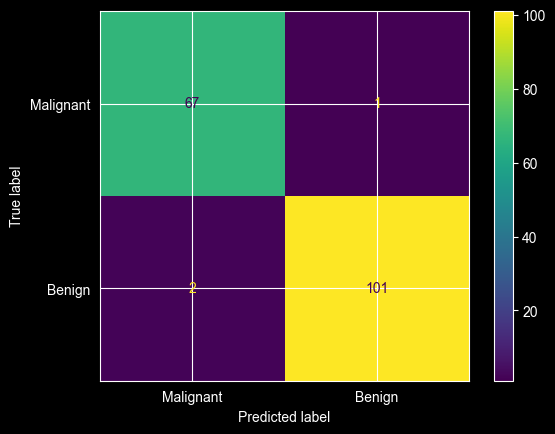

In [47]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(df_features_train, df_targets_train["target"])


df_targets_predicted = model.predict(df_features_test)
cm = confusion_matrix(df_targets_test, df_targets_predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Malignant','Benign'])
cmd.plot()

accuracy = accuracy_score(df_targets_test, df_targets_predicted)
print("Accuracy:", accuracy)

precision = precision_score(df_targets_test, df_targets_predicted)
print("Precision:", precision)

recall = recall_score(df_targets_test, df_targets_predicted)
print("Recall:", recall)

#model.predict(df_features_test)
#model.predict(df_scaled_features.iloc[1:2])
#df_scaled_features.iloc[2:3]